# Imports

In [17]:
# Para melhor organização dos dados em tabelas/matrizes
import pandas as pd

# Para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator # Número de grupos ideal do agrupamento
from sklearn.cluster import KMeans, DBSCAN # Métodos de Agrupamento
from sklearn_som.som import SOM

# Para analizar as silhuetas
from sklearn.metrics import silhouette_score

# Para calcular
import math

import numpy as np

# Dados

In [18]:
# O arquivo de dados não está incluso no Git por ser grande demais, então deve ser baixado separadamente
#dados = pd.read_csv('creditcard.csv', sep=',', na_values=["", " ", "NA", "N/A"])
# Dados processados na questão 1
dados = pd.read_csv('creditcard_processado.csv', sep=',', na_values=["", " ", "NA", "N/A"])
dados

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V14,V16,V17,V18,V19,V20,V21,V27,Amount,Class
0,0.884428,0.955536,0.341736,0.655627,0.533265,0.887298,0.673906,0.821908,0.862310,0.164662,...,0.834328,0.790958,0.795268,0.716720,0.458562,0.288374,0.455582,0.717057,0.070381,0.0
1,0.961734,0.888221,0.284716,0.667625,0.490972,0.880848,0.673683,0.785023,0.853303,0.308486,...,0.841716,0.845060,0.785150,0.700981,0.396860,0.267271,0.451433,0.703239,0.001265,0.0
2,0.896350,0.934421,0.204311,0.665506,0.594196,0.887258,0.678472,0.717616,0.857218,0.186266,...,0.835354,0.756837,0.767305,0.862704,0.274884,0.258122,0.453782,0.710190,0.058094,0.0
3,0.890534,0.927483,0.281950,0.653552,0.504813,0.894457,0.667858,0.848949,0.885451,0.146637,...,0.798643,0.792055,0.781318,0.711905,0.503397,0.298721,0.455759,0.725380,0.032923,0.0
4,0.912719,0.915905,0.246924,0.678497,0.495058,0.892092,0.676553,0.766363,0.846160,0.290447,...,0.842009,0.841459,0.786926,0.719945,0.409496,0.277415,0.451783,0.728717,0.001726,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220694,0.987416,0.849496,0.271622,0.665554,0.440957,0.882789,0.670353,0.826174,0.868494,0.236092,...,0.875701,0.831246,0.769776,0.702510,0.476261,0.254903,0.450587,0.696275,0.001261,0.0
220695,0.929270,0.867983,0.211557,0.699862,0.479046,0.898909,0.674175,0.788082,0.836167,0.244168,...,0.815767,0.852918,0.790957,0.742856,0.427688,0.271865,0.449664,0.725236,0.001265,0.0
220696,0.903424,0.941296,0.211956,0.691968,0.579539,0.882937,0.677119,0.835073,0.825038,0.191336,...,0.818263,0.776982,0.787943,0.622886,0.239763,0.275746,0.460232,0.710747,0.011661,0.0
220697,0.983780,0.791187,0.223039,0.745048,0.732706,0.876430,0.683893,0.825998,0.842199,0.228669,...,0.825526,0.826345,0.798575,0.744552,0.348436,0.271912,0.460589,0.704541,0.031930,0.0


In [19]:
n_instancias = len(dados.index)

# Agrupamentos

In [20]:
# O correto seria considerar o quadrado da metade de instâncias como o número de clusters,
#  só que isso dá um número absurdo (cerca de 300), então vou reduzir para
#  ficar viável os testes (em quesito de tempo de processamento)
#clusters_max = int(math.sqrt( len(dados.index)/2 ))
clusters_max = 15

In [ ]:
cores = []
cores.append((0.0, 0.0, 0.0)) # Preto para Centroids
cores.append((0.9, 0.1, 0.1)); cores.append((0.1, 0.9, 0.1)); cores.append((0.1, 0.1, 0.9))
cores.append((0.6, 0.6, 0.1)); cores.append((0.1, 0.6, 0.6)); cores.append((0.6, 0.1, 0.6))
cores.append((0.8, 0.6, 0.1)); cores.append((0.1, 0.8, 0.6)); cores.append((0.8, 0.1, 0.6))

## Distribuição Real

In [21]:
#dados_copia = dados.copy()
#dados_copia = dados_copia.drop(columns=['Class'])
#dados_copia = dados_copia.drop(columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10'])
#dados_copia = dados_copia.drop(columns=['V1', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10'])
#dados_copia = dados_copia.drop(columns=['V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20'])
#dados_copia = dados_copia.drop(columns=['V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'])

# Matriz de gráficos scatter
#sns.pairplot(dados_copia, hue='Class', height=3.5)

#plt.show()

## K-Means

In [22]:
dados_kmeans = dados.copy()
dados_kmeans = dados_kmeans.drop(columns=['Class'])

### Encontrar número ideal de clusters

In [23]:
wcss = [];
for i in range(2, clusters_max):
  modelo_kmeans = KMeans(n_clusters=i, random_state=69)
  modelo_kmeans.fit(dados_kmeans)

  wcss.append(modelo_kmeans.inertia_)

In [24]:
kl = KneeLocator(range(2, clusters_max), wcss, curve="convex", direction="decreasing")
clusters_elbow = int(kl.elbow)
clusters_elbow

8

Visualização com o método elbow

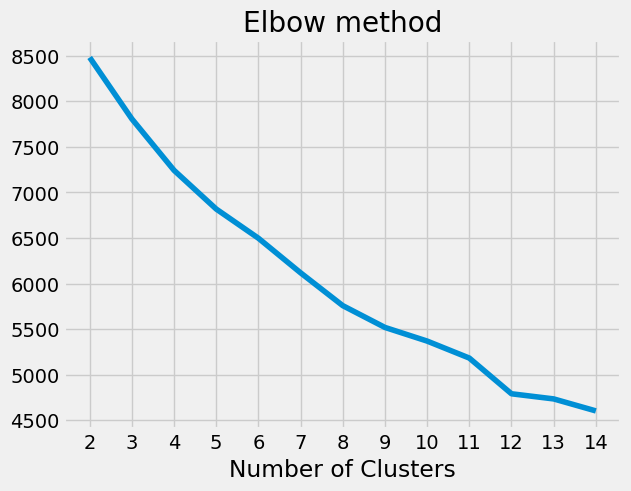

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, clusters_max), wcss)
plt.xticks(range(2, clusters_max))
plt.title('Elbow method')
plt.xlabel("Number of Clusters")
plt.show()

### Resultados

Com número de clusters ideal encontrado

In [26]:
modelo_kmeans = KMeans(n_clusters=clusters_elbow, random_state=69)
saida_kmeans_ideal = modelo_kmeans.fit_predict(dados_kmeans)
predict_kmeans_ideal = modelo_kmeans.predict(dados_kmeans)
score_kmeans_ideal = silhouette_score(dados_kmeans, predict_kmeans_ideal)

In [27]:
print(saida_kmeans_ideal)
print(len(saida_kmeans_ideal))
print(list(set(saida_kmeans_ideal)))

[0 3 7 ... 6 2 1]
220699
[np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7)]


In [28]:
#print(dados_kmeans)
print(type(dados_kmeans))
dados_kmeans = dados_kmeans.to_numpy()
print(type(dados_kmeans))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


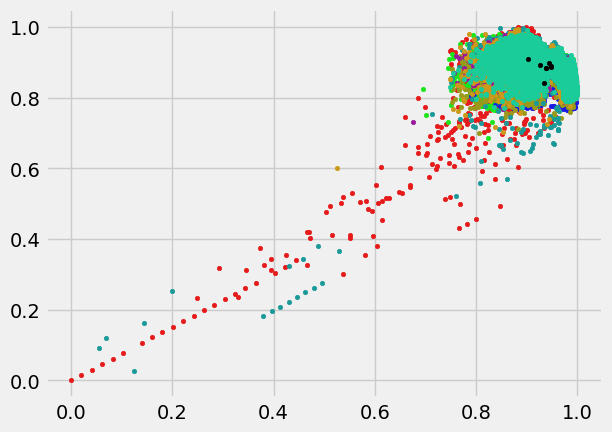

In [47]:
# Classes
plt.scatter(dados_kmeans[saida_kmeans_ideal == 0, 0], dados_kmeans[saida_kmeans_ideal == 0, 1], s = 10, color = cores[1], label = 'Grupo1')
plt.scatter(dados_kmeans[saida_kmeans_ideal == 1, 0], dados_kmeans[saida_kmeans_ideal == 1, 1], s = 10, color = cores[2], label = 'Grupo2')
plt.scatter(dados_kmeans[saida_kmeans_ideal == 2, 0], dados_kmeans[saida_kmeans_ideal == 2, 1], s = 10, color = cores[3], label = 'Grupo3')
plt.scatter(dados_kmeans[saida_kmeans_ideal == 3, 0], dados_kmeans[saida_kmeans_ideal == 3, 1], s = 10, color = cores[4], label = 'Grupo4')
plt.scatter(dados_kmeans[saida_kmeans_ideal == 4, 0], dados_kmeans[saida_kmeans_ideal == 4, 1], s = 10, color = cores[5], label = 'Grupo5')
plt.scatter(dados_kmeans[saida_kmeans_ideal == 5, 0], dados_kmeans[saida_kmeans_ideal == 5, 1], s = 10, color = cores[6], label = 'Grupo6')
plt.scatter(dados_kmeans[saida_kmeans_ideal == 6, 0], dados_kmeans[saida_kmeans_ideal == 6, 1], s = 10, color = cores[7], label = 'Grupo7')
plt.scatter(dados_kmeans[saida_kmeans_ideal == 7, 0], dados_kmeans[saida_kmeans_ideal == 7, 1], s = 10, color = cores[8], label = 'Grupo8')
# Centróides
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1], s = 10, color = cores[0], label = 'Centroids')


Com número de clusters reais

In [ ]:
modelo_kmeans = KMeans(n_clusters=2, random_state=69)
saida_kmeans_real = modelo_kmeans.fit_predict(dados_kmeans)
predict_kmeans_real = modelo_kmeans.predict(dados_kmeans)
score_kmeans_real = silhouette_score(dados_kmeans, predict_kmeans_real)

In [ ]:
# Classes
plt.scatter(dados_kmeans[saida_kmeans_real == 0, 0], dados_kmeans[saida_kmeans_real == 0, 1], s = 10, color = cores[1], label = 'Verídica')
plt.scatter(dados_kmeans[saida_kmeans_real == 1, 0], dados_kmeans[saida_kmeans_real == 1, 1], s = 10, color = cores[2], label = 'Fraude')
# Centróides
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:,1], s = 10, color = cores[0], label = 'Centroids')

plt.show()

## DBSCAN

In [ ]:
dados_dbscan = dados.copy()
dados_dbscan = dados_dbscan.drop(columns=['Class'])

In [ ]:
modelo_dbscan = DBSCAN( eps=0.3, min_samples=(int(n_instancias/100)) )
dbscan = modelo_dbscan.fit(dados_dbscan)

InvalidParameterError: The 'min_samples' parameter of DBSCAN must be an int in the range [1, inf). Got 2206.99 instead.

In [ ]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels

clusters_dbscan = len(set(labels))

In [ ]:
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
       
        col = 'k'

    class_member_mask = (labels == k)

    xy = dados_dbscan[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = dados_dbscan[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % clusters_dbscan)
plt.show()

## SOM